## Shopify Technical Challenge Problem 1

### Problem:
#### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of 3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### Objective:
#### Find a better way to evaluate the Average Order Value


In [1]:
# Importing Libraries

import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the source file and cleaning it

stores_csv_path = Path("Resources/set1.csv")
df = pd.read_csv(
    stores_csv_path,
)
df = df.set_index("order_id")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(10)

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


In [3]:
# Doing the original AOV calculation

original_aov = df['order_amount'].mean()
original_aov

3145.128

In [4]:
# Adding a new column that shows the price of the shoe each shop sells

df['shoe_cost'] = df['order_amount'] / df['total_items']
df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_cost
order_id,,,,,,,
16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0


In [5]:
# Sorting by the most expensive shoe to see if there are any unusual numbers

df_price = df.sort_values(by=['shoe_cost'], ascending=False)
df_price.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_cost
order_id,,,,,,,
2822,78,814,51450,2,cash,2017-03-02 17:13:25,25725.0
3152,78,745,25725,1,credit_card,2017-03-18 13:13:07,25725.0
512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
1530,78,810,51450,2,cash,2017-03-29 7:12:01,25725.0


<AxesSubplot:title={'center':'Price Per Shoe'}>

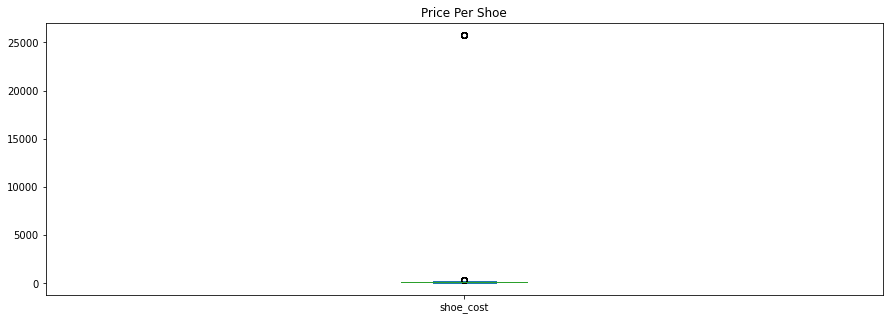

In [11]:
# Checking for outliers with a box plot

df_price = df_price[['shoe_cost']]
df_price.plot(title = "Price Per Shoe", figsize = (15, 5), kind = "box")

#### The Box Plot shows one significant outlier in terms of Shoe Price

In [7]:
# Sorting by the largest orders to see if there are any unusual numbers

df_items = df.sort_values(by=['total_items'], ascending=False)
df_items.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_cost
order_id,,,,,,,
16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00,352.0
4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00,352.0
4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0


<AxesSubplot:title={'center':'Order Size'}>

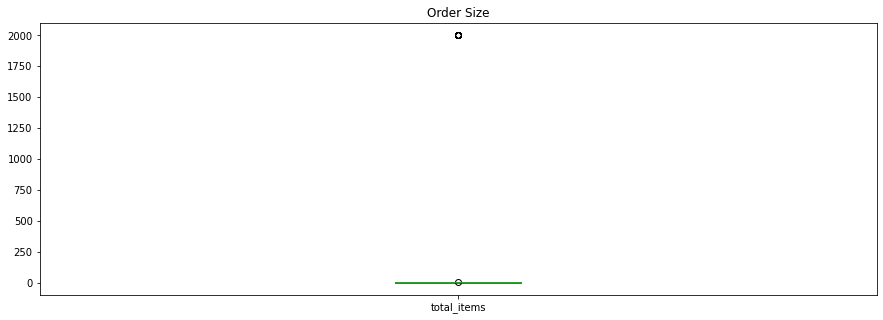

In [10]:
# Checking for outliers with a box plot

df_items = df_items[['total_items']]
df_items.plot(title = "Order Size", figsize = (15, 5), kind = "box")

#### The Box Plot shows one significant outlier in terms of Order Size

### Processing the Data Frame to Remove Outliers

In [12]:
# Making a dataframe with only the metrics that contain outliers

process_df = df[['total_items', 'shoe_cost']]
process_df.head()

,total_items,shoe_cost
order_id,,
16,2000,352.0
61,2000,352.0
521,2000,352.0
1105,2000,352.0
1363,2000,352.0


In [10]:
process_df.describe()

,total_items,shoe_cost
count,5000.00000,5000.000000
mean,8.78720,387.742800
std,116.32032,2441.963725
min,1.00000,90.000000
25%,1.00000,133.000000
50%,2.00000,153.000000
75%,3.00000,169.000000
max,2000.00000,25725.000000


In [16]:
# Creating a function to identify outliers in a given field in a dataframe. Using an outlier as being 3 standard deviations away from 
# the median value for all of the shops.

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    low_ol = Q1 - 1.5 * IQR
    high_ol = Q3 + 1.5 * IQR
    
    ol = df.index[(df[ft] < low_ol) | (df[ft] > high_ol)]
    return ol
    

In [17]:
# Looping through the data frame and creating a list of outlier store ID's

outlier_list = []

for i in ['total_items', 'shoe_cost']:
    outlier_list.extend(outliers(process_df, i))

In [18]:
# Creating a function that removes a given list of indexes from a given dataframe

def remove_list(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [19]:
# Finally processing the dataframe by removing the outlier shops

final_df = remove_list(df, outlier_list)

In [20]:
df.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_cost
order_id,,,,,,,
16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0


In [21]:
# Re-calculating the average order value without the outliers

final_aov = final_df['order_amount'].mean()
final_aov

300.0

### The re-calculated average order value is $300.00